In [1]:
from konlpy.tag import Okt
twitter = Okt()

#형태소 분석, norm정규화, stem 어근화
word_list = twitter.pos('아버지가 방에 들어가신다.', norm=True, stem=True)
print(word_list)

[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [4]:
from gensim.models import word2vec
import codecs
from konlpy.tag import Okt

#분석할 텍스트 불러오기
f = open('c:/data/text/ratings.csv', encoding='utf-8')
data = f.read()
twitter = Okt()

#전체 텍스트를 라인 단위로 나누어 배열로 저장
lines = data.split('\n')
results = []
print(len(lines))
for line in lines[:1000]:
    print(line[:10])
    r = []
    #norm = True
    word_list = twitter.pos(line, norm=True, stem=True)
    #조사, 어미, 문장부호를 제외하고 배열에 추가
    for (word, pumsa) in word_list:
        if not pumsa in ['Josa', 'Eomi', 'Punctuation']:
            r.append(word)
            #r.append(word) #모든 어휘를 다 포함
    results.append((' '.join(r)).strip())

output = (' '.join(results)).strip()

#단어들을 파일에 저장
with open('c:/data/text/text_prepared.dat', 'w', encoding='utf-8') as fp:
    fp.write(output)

print('작업 완료')

167571
﻿id,docume
8112052,어릴
8132799,"디
4655635,폴리
9251303,와.
10067386,안
2190435,사랑
9279041,완전
7865729,개들
7477618,굿,
9250537,바보
9730759,내 
640794,재밌다
9537008,고질
4911311,영화
6686673,3도
9034036,평점
979683,네고시
165498,단연 
8703997,가면
9468781,어?
5185638,오랜
10221267,그
486781,마지막
7776793,"강
9694764,중세
10232169,"
8515083,사람
9758264,인간
9281669,최고
7517650,"실
4339983,존 
10225238,농
7295706,이거
5161286,친구
8906022,굿굿
8323152,아 
10124911,제
9852390,보는
1421412,원표
6809191,"마
5717439,"정
8824828,이 
5247378,난 
8719068,도법
1111967,정말
10142929,내
10050104,인
10082134,"
6825477,반가
10272889,내
8715095,정말
87993,정말재밋
3454102,탱고
8667840,평생
8619006,이런
1923466,정말
9985813,너무
10151722,잔
1516658,내가
8255656,재밌
4469803,상당
6212210,역시
1364440,내 
9049119,전작
2549508,지금
3017342,"신
6784667,3.
9611384,추석
10092383,"
5784847,재미
9421346,생각
9814476,저게
9334812,나만
8377531,우리
2736470,방학
9637948,마음
1987338,엔트
9668399,정말
9247479,처음
8499726,너무
8620641,내가
7360402,음 
9384295,가을
8550276,os
9339372,중3
8095702,사실
10248728,뀰
3812917,짱 
8418558,첫느
793

In [8]:
#저장된 파일을 이용하여 word2vec 모델을 만드는 과정
data = word2vec.LineSentence('c:/data/text/text_prepared.dat')

#size = 벡터차원,
#window = 10 앞뒤 10개의 주변 단어를 문맥으로 보고 예측 모델에 반영
#hs=1 소프트맥스 사용, min_count=2 출현빈도 2미만은 제외,
#sg=1 cbow와 skip-gram 알고리즘 중 skip-gram 사용
model = word2vec.Word2Vec(data, vector_size=100, window=10, hs=1, min_count=2, sg=1)

#모델을 파일로 저장
model.save('c:/data/text/text_100.model')
print('word2vec 모델 생성 완료')

word2vec 모델 생성 완료


In [10]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
text = open('c:/data/text/ratings.csv', encoding='utf-8').read()
wordcloud = WordCloud(\
    font_path='c:/Windows/Fonts/malgun.ttf').generate(text)
wordcloud.words_

print('wordcloud 생성 완료')

wordcloud 생성 완료


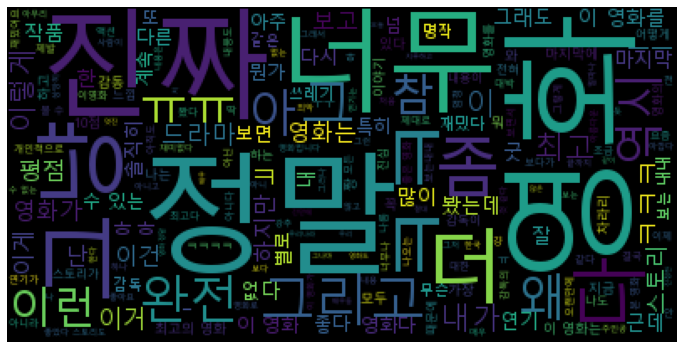

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
#저장된 모델 파일을 불러올 경우
model = word2vec.Word2Vec.load('c:/data/text/text_100.model')

#키워드와 유사한 단어를 찾을 경우
print(model.wv.most_similar(positive=['영화']))
print(model.wv.most_similar(positive=['드라마']))

#similarity(A,B) A와 B의 유사도
print(model.wv.similarity('영화', '드라마'))

#이상한 키워드 찾기
print(model.wv.doesnt_match('영화 드라마 이야기 완전'.split()))

[('암', 0.9856408834457397), ('살', 0.9851185083389282), ('관람', 0.9848319888114929), ('어린시절', 0.9847407937049866), ('애니메이션', 0.9846884608268738), ('원', 0.984381914138794), ('인정', 0.9843218922615051), ('사라지다', 0.9842622876167297), ('반', 0.9840100407600403), ('대한민국', 0.9839915037155151)]
[('아', 0.9676498174667358), ('이렇다', 0.9632933735847473), ('요리', 0.9628281593322754), ('여배우', 0.9622288346290588), ('씨', 0.9621537923812866), ('만점', 0.9614073038101196), ('성격', 0.9613613486289978), ('또', 0.9610852003097534), ('중', 0.9589528441429138), ('파파로티', 0.9579719305038452)]
0.9287349
이야기
